1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [33]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pandas as pd

Eigenvalues with PCA are: [2.56029480e+01+0.j 2.51422600e-15+0.j 1.92876541e+00+0.j]
Eigenvectors with PCA are: [[-0.10710775 -0.81649658  0.56732818]
 [-0.58772453 -0.40824829 -0.69850785]
 [-0.80194003  0.40824829  0.43614851]]
Eigenvalues with SVD: [2.56054234e+01 1.93161141e+00 9.40716338e-31]
Eigenvectors with SVD: [[-0.10717135  0.56731617 -0.81649658]
 [-0.58764621 -0.69857373 -0.40824829]
 [-0.80198892  0.4360586   0.40824829]]
1.0  of the total variance on our data is explained by pc1 & pc2


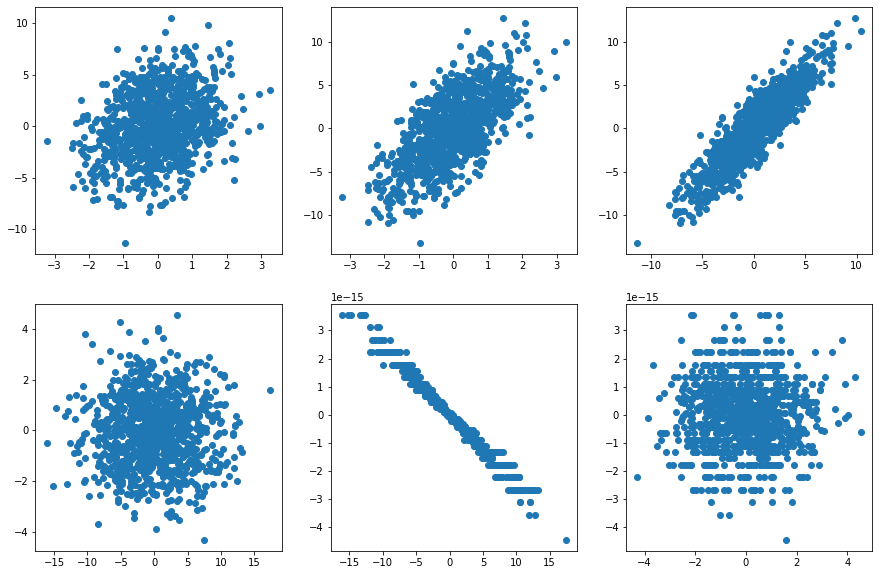

In [29]:
N = 1000
x1 = np.random.normal(0,1, N)
x2 = x1 + np.random.normal(0,3, N)
x3 = 2*x1 + x2
x  = np.array([x1, x2, x3])

eigenval_pca, eigenvec_pca = la.eig(np.cov(x))
print("Eigenvalues with PCA are:", eigenval_pca)
print("Eigenvectors with PCA are:" ,eigenvec_pca)

U, sigma, Vt = la.svd(x)
eigenval_svd = sigma**2/(N-1)
eigenvec_svd = U
print("Eigenvalues with SVD:", eigenval_svd)
print("Eigenvectors with SVD:", eigenvec_svd)
print((eigenval_svd[0]+eigenval_svd[1])/np.sum(eigenval_svd)," of the total variance on our data is explained by pc1 & pc2")
projection_matrix=U
x_pca=np.dot(projection_matrix.T,x)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0,0].scatter(x[0], x[1])
ax[0,1].scatter(x[0], x[2])
ax[0,2].scatter(x[1], x[2])
ax[1,0].scatter(x_pca[0], x_pca[1])
ax[1,1].scatter(x_pca[0], x_pca[2])
ax[1,2].scatter(x_pca[1], x_pca[2])

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Eigenvalues with PCA are: [28.89482126+0.j  3.42446861+0.j  5.82430365+0.j]
Eigenvectors with PCA are: [[-0.09967553 -0.78094703  0.61659268]
 [-0.58973803 -0.45274174 -0.66875554]
 [-0.80141989  0.43028671  0.41542689]]
Eigenvalues with SVD: [28.91587924  5.82705398  3.42447654]
Eigenvectors with SVD: [[-0.09945968  0.61667352 -0.78091071]
 [-0.58995125 -0.66853321 -0.45279231]
 [-0.80128977  0.41566467  0.43029942]]
0.9102774708290393  of the total variance on our data is explained by pc1 & pc2


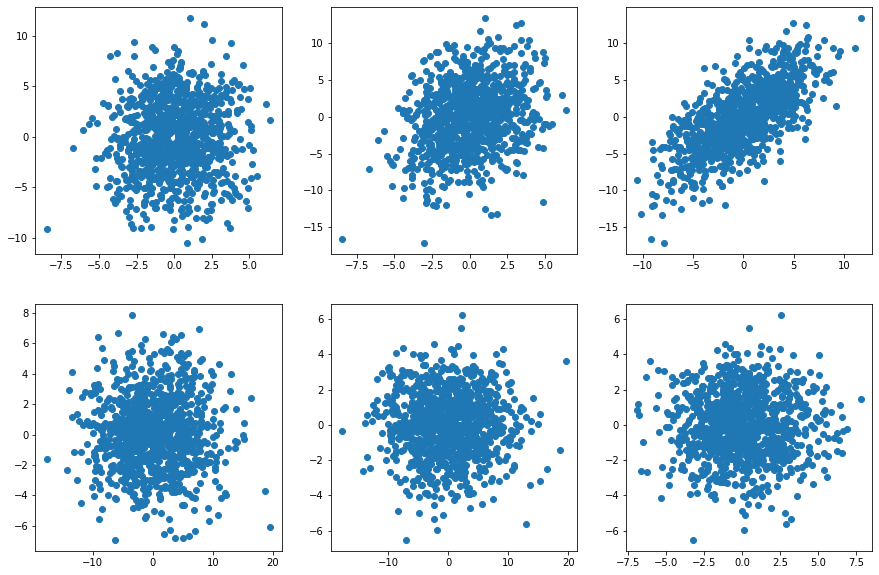

In [36]:
noise = np.random.rand(10)
N = 1000
x1 = np.random.normal(0,1, N)
x2 = x1 + np.random.normal(0,3, N)
x3 = 2*x1 + x2
x  = np.array([x1, x2, x3])
for i in noise :
    x1 += i*np.random.randn(N)
    x2 += i*np.random.randn(N)
    x3 += i*np.random.randn(N)
x = np.array([x1, x2, x3])
eigenval_pca, eigenvec_pca = la.eig(np.cov(x))
print("Eigenvalues with PCA are:", eigenval_pca)
print("Eigenvectors with PCA are:" ,eigenvec_pca)

U, sigma, Vt = la.svd(x)
eigenval_svd = sigma**2/(N-1)
eigenvec_svd = U
print("Eigenvalues with SVD:", eigenval_svd)
print("Eigenvectors with SVD:", eigenvec_svd)
print((eigenval_svd[0]+eigenval_svd[1])/np.sum(eigenval_svd)," of the total variance on our data is explained by pc1 & pc2")
projection_matrix=U
x_pca=np.dot(projection_matrix.T,x)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0,0].scatter(x[0], x[1])
ax[0,1].scatter(x[0], x[2])
ax[0,2].scatter(x[1], x[2])
ax[1,0].scatter(x_pca[0], x_pca[1])
ax[1,1].scatter(x_pca[0], x_pca[2])
ax[1,2].scatter(x_pca[1], x_pca[2])

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [31]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [81]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
df = pd.read_csv(url,names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','classes'])
#N is the number of rows
N=19019
G=df[df["classes"]=="g"].drop(["classes"],axis=1)
H=df[df["classes"]=="h"].drop(["classes"],axis=1)
Hclass=H.to_numpy()   
Gclass=G.to_numpy() 

U_H, sigma_H, Vt_H = la.svd(Hclass)
eigenval_H = sigma_H**2/(N-1)
eigenvec_H = U_H

U_G, sigma_G, Vt_G = la.svd(Gclass)
eigenval_G = sigma_G**2/(N-1)
eigenvec_G = U_G

variance_explained_H=[]
for i in eigenval_H:
    variance_explained_H.append((i/np.sum(eigenval_H))*100)
print(np.cumsum(variance_explained_H))
#our eigenvalues should cover at least 95% of the total variance
projection_matrix_H=(U_H[ : , :4])
Hclass_PCA=np.dot(projection_matrix_H.T,Hclass)
                
variance_explained_G=[]
for i in eigenval_G:
    variance_explained_G.append((i/np.sum(eigenval_G))*100)
print(np.cumsum(variance_explained_G))
#our eigenvalues should cover at least 95% of the total variance
projection_matrix_G=(U_G[ : , :2])
Gclass_PCA=np.dot(projection_matrix_G.T,Gclass)


print("NOW WE CAN WORK WITH GCLASS_PCA AND HCLASS_PCA INSTEAD OF GLASS AND HCLASS ")










[ 77.31149023  88.194187    93.72489841  97.11270929  98.41784889
  99.65178252  99.99916303  99.99994651  99.99999925 100.        ]
[ 91.91356981  95.44202399  97.79188935  98.91167982  99.53073229
  99.91177452  99.99929606  99.99995521  99.99999929 100.        ]
NOW WE CAN WORK WITH GCLASS_PCA AND HCLASS_PCA INSTEAD OF GLASS AND HCLASS 
